# **1. Import and Install Dependencies**

In [2]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe scikit-learn matplotlib

In [3]:
%pip install numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:


pip -V

pip 23.1.2 from c:\Users\ABHINAV ANAND\miniconda3\lib\site-packages\pip (python 3.7)Note: you may need to restart the kernel to use updated packages.




In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# **2. Keypoints using MP Holistic**

In [3]:
#Holistic model
mp_holistic = mp.solutions.holistic

#Drawing Utilities
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
VID_PATH = os.path.join('FKS') 

In [214]:
cap = cv2.VideoCapture(0)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

size = (frame_width, frame_height)

input_vid = input("Enter Video name")


result = cv2.VideoWriter(f'Sign_Gestures\{input_vid}.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret == True:
        result.write(frame)
    
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    else:
        break
    
cap.release()
result.release()
cv2.destroyAllWindows()
    
    

In [140]:
input_sen = "w"

nltk_tokens = nltk.sent_tokenize()


for x in range(len(input_sen)):
    
    cap = cv2.VideoCapture(f'Sign_Gestures\{input_sen[x]}.avi')

    while cap.isOpened():
        
        ret, frame = cap.read()
        
        if ret == True:
            # Display the resulting frame
            cv2.imshow('Frame', frame)
            
        # Press Q on keyboard to exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
    
        # Break the loop
        else:
            break
    
# When everything done, release
# the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

In [141]:
cap = cv2.VideoCapture(f'Sign_Gestures\How Are YOU.avi')
while cap.isOpened():
        
    ret, frame = cap.read()
        
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame', frame)
            
        # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    
    # Break the loop
    else:
        break
    
# When everything done, release
# the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
frame

array([[[213, 203, 175],
        [213, 204, 177],
        [214, 203, 179],
        ...,
        [ 29,  50,  91],
        [ 39,  52,  96],
        [ 39,  51,  96]],

       [[215, 206, 177],
        [214, 204, 177],
        [214, 203, 179],
        ...,
        [ 31,  50,  84],
        [ 34,  50,  88],
        [ 35,  51,  89]],

       [[208, 200, 176],
        [209, 201, 177],
        [212, 204, 179],
        ...,
        [ 25,  50,  81],
        [ 26,  48,  80],
        [ 28,  49,  82]],

       ...,

       [[ 75,  71,  85],
        [ 77,  74,  86],
        [ 73,  71,  81],
        ...,
        [  0,  15,  37],
        [  0,  13,  34],
        [  0,  11,  32]],

       [[ 77,  71,  85],
        [ 70,  71,  82],
        [ 67,  74,  83],
        ...,
        [  0,  11,  30],
        [  0,  12,  31],
        [  0,  14,  32]],

       [[ 79,  76,  90],
        [ 75,  76,  90],
        [ 71,  77,  90],
        ...,
        [  0,  14,  32],
        [  0,  13,  31],
        [  0,  15,  34]]

In [11]:
draw_styled_landmarks(frame, results)

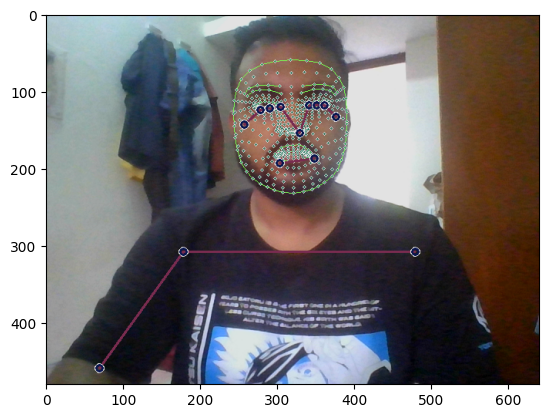

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# **3. Extract Keypoint Values**

In [13]:

len(results.pose_landmarks.landmark)

33

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
len(pose)

33

In [16]:
pose

[array([ 0.51462495,  0.32112297, -1.23109841,  0.9998371 ]),
 array([ 0.53405082,  0.24727434, -1.17300057,  0.99969769]),
 array([ 0.54907507,  0.24691334, -1.17297494,  0.99971479]),
 array([ 0.56540424,  0.24670468, -1.17334044,  0.99968046]),
 array([ 0.47602263,  0.2518945 , -1.17532003,  0.99966234]),
 array([ 0.45425153,  0.25476348, -1.17469108,  0.99967152]),
 array([ 0.43438816,  0.25934085, -1.17508495,  0.99964207]),
 array([ 0.58875948,  0.27840465, -0.72617346,  0.999726  ]),
 array([ 0.40303096,  0.29966024, -0.71844637,  0.9997983 ]),
 array([ 0.54448742,  0.39044845, -1.06063294,  0.99989575]),
 array([ 0.4740704 ,  0.40257394, -1.05738997,  0.99990213]),
 array([ 0.74858475,  0.64212906, -0.4451952 ,  0.9994325 ]),
 array([ 0.27890283,  0.64312464, -0.46984372,  0.9989717 ]),
 array([ 0.86688054,  0.97539848, -0.40701032,  0.47046277]),
 array([ 0.10880993,  0.95688432, -0.40064877,  0.60021323]),
 array([ 0.92030513,  1.41288686, -0.82335395,  0.07291906]),
 array([

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [19]:
pose.shape

(132,)

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
extract_keypoints(results).shape

(1662,)

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.51462495,  0.32112297, -1.23109841, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello','Indian','Sign','Language','Again','I','You','Man','Woman','Deaf','Hearing','Teacher','Thankyou','Welcome','Sorry','Namaste','How are you','My name is'])

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 30

In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [27]:
len(actions)

18

In [28]:

actions

array(['Hello', 'Indian', 'Sign', 'Language', 'Again', 'I', 'You', 'Man',
       'Woman', 'Deaf', 'Hearing', 'Teacher', 'Thankyou', 'Welcome',
       'Sorry', 'Namaste', 'How are you', 'My name is'], dtype='<U11')

# 5. Collect Keypoint Values for Training and Testing

In [49]:
cap = cv2.VideoCapture(0)
exit = False
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    action_no = input("Enter action index: ")
    action_name = actions[int(action_no)]
    # print(action_name)
    ans = input(f"Do you want to continue '{action_name}' ?")
    if(ans == "0"):
        pass
    else:    
        # Loop through sequences aka videos
        for sequence in range(no_sequences-30):
            if exit == True:
                break
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action_name, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    # cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action_name, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action_name, str(sequence+30), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    exit = True
                    break
                
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map


{'Hello': 0,
 'Indian': 1,
 'Sign': 2,
 'Language': 3,
 'Again': 4,
 'I': 5,
 'You': 6,
 'Man': 7,
 'Woman': 8,
 'Deaf': 9,
 'Hearing': 10,
 'Teacher': 11,
 'Thankyou': 12,
 'Welcome': 13,
 'Sorry': 14,
 'Namaste': 15,
 'How are you': 16,
 'My name is': 17}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(1080, 30, 1662)

In [33]:
np.array(sequences)

array([[[ 0.51215184,  0.50369537, -0.47349185, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.52507627,  0.50405151, -0.5163846 , ...,  0.40612209,
          0.39384693, -0.00903125],
        [ 0.5251236 ,  0.50580448, -0.54258192, ...,  0.40811509,
          0.39703214, -0.01142699],
        ...,
        [ 0.52733046,  0.5185684 , -0.62379283, ...,  0.40462431,
          0.40830946, -0.00674341],
        [ 0.52806103,  0.5186727 , -0.62368226, ...,  0.40725973,
          0.40803728, -0.00763713],
        [ 0.52847421,  0.51951498, -0.6241672 , ...,  0.40359873,
          0.40841416, -0.00956618]],

       [[ 0.52848452,  0.52099037, -0.62579435, ...,  0.40235654,
          0.40742087, -0.01175874],
        [ 0.52847564,  0.52084571, -0.67738444, ...,  0.26261899,
          0.35090625, -0.00582798],
        [ 0.52844626,  0.52087671, -0.73582071, ...,  0.26461458,
          0.35431027, -0.00708324],
        ...,
        [ 0.52615482,  0.52198476, -0.74079096, ...,  

In [34]:
np.array(labels).shape

(1080,)

In [35]:
np.array(labels)

array([ 0,  0,  0, ..., 17, 17, 17])

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(1080, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [40]:
y.shape

(1080, 18)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
y_test.shape

(54, 18)

In [43]:
X_train.shape

(1026, 30, 1662)

# 7. Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [58]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [111]:
res = [.7, 0.2, 0.1]

In [ ]:
np.argmax(res[3])

IndexError: list index out of range

In [59]:
actions

array(['Hello', 'Indian', 'Sign', 'Language', 'Again', 'I', 'You', 'Man',
       'Woman', 'Deaf', 'Hearing', 'Teacher', 'Thankyou', 'Welcome',
       'Sorry', 'Namaste', 'How are you', 'My name is'], dtype='<U11')

In [77]:
actions[np.argmax(res)]

IndexError: index 125 is out of bounds for axis 0 with size 18

In [60]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
X_train

array([[[ 0.53679073,  0.46250591, -0.61801231, ...,  0.36758962,
          0.50737536, -0.04744113],
        [ 0.53679717,  0.46294624, -0.61934996, ...,  0.35833526,
          0.51858759, -0.03463664],
        [ 0.53721344,  0.46323445, -0.63878095, ...,  0.35907167,
          0.52808654, -0.030728  ],
        ...,
        [ 0.58661985,  0.42786261, -0.62244242, ...,  0.36449054,
          0.46601436, -0.02009393],
        [ 0.58332801,  0.44067794, -0.62375623, ...,  0.37040627,
          0.46928138, -0.02387325],
        [ 0.58177698,  0.44846374, -0.63200778, ...,  0.37032664,
          0.45842537, -0.03069777]],

       [[ 0.55235082,  0.4217799 , -0.67345738, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55861753,  0.41528934, -0.61502391, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56643569,  0.41535059, -0.65092993, ...,  0.09138022,
          0.85834062, -0.05714082],
        ...,
        [ 0.54649293,  0.43221155, -0.6777311 , ...,  

In [62]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
33/33 [==============================] - 12s 113ms/step - loss: 3.6211 - categorical_accuracy: 0.0604
Epoch 2/250
33/33 [==============================] - 4s 125ms/step - loss: 2.7374 - categorical_accuracy: 0.1062
Epoch 3/250
33/33 [==============================] - 4s 133ms/step - loss: 2.6046 - categorical_accuracy: 0.1014
Epoch 4/250
33/33 [==============================] - 4s 133ms/step - loss: 2.3718 - categorical_accuracy: 0.1530
Epoch 5/250
33/33 [==============================] - 4s 120ms/step - loss: 2.3221 - categorical_accuracy: 0.1686
Epoch 6/250
33/33 [==============================] - 4s 124ms/step - loss: 2.1417 - categorical_accuracy: 0.2710
Epoch 7/250
33/33 [==============================] - 4s 117ms/step - loss: 2.2516 - categorical_accuracy: 0.1706
Epoch 8/250
33/33 [==============================] - 4s 115ms/step - loss: 1.8529 - categorical_accuracy: 0.2807
Epoch 9/250
33/33 [==============================] - 4s 133ms/step - loss: 1.7361 - categorical

KeyboardInterrupt: 

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_15 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_16 (LSTM)              (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 18)               

# 8. Make Predictions

In [64]:
res = model.predict(X_test)

In [ ]:
np.argmax(res[4])

3

In [ ]:
actions[np.argmax(res[4])]

'Language'

In [122]:
actions[np.argmax(y_test[4])]

'Teacher'

# 9. Save Weights

In [65]:
model.save('action4.h5')

In [ ]:
model = Sequential()

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

ERROR: Invalid requirement: "'h5py==2.10.0'"


In [49]:
from tensorflow.keras.models import load_model
model = load_model('./action3.h5' , compile=False)

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 18)                594       
                                                                 
Total params: 597,170
Trainable params: 597,170
Non-tr

In [ ]:
model.load_weights('action2.h5')

ValueError: Cannot assign value to variable ' dense_2/kernel:0': Shape mismatch.The variable shape (32, 6), and the assigned value shape (32, 3) are incompatible.

# 10. Facial Epression Detection

In [ ]:
%pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [66]:
from keras.models import load_model
from time import sleep
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [67]:
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
classifier =load_model('./Emotion_Detection.h5')

class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

cap = cv2.VideoCapture(0)

In [54]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                      

Loading...
Action Detection Refined.ipynb
Action Detection Refined.ipynb_
1. Import and Install Dependencies
[ ]
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
[ ]
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
2. Keypoints using MP Holistic
[ ]
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
[ ]
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
[ ]
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right
[ ]
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
[ ]
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
[ ]
draw_landmarks(frame, results)
[ ]
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values
[ ]
len(results.left_hand_landmarks.landmark)
21
[ ]
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
[ ]
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
[ ]
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
[ ]
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
[ ]
result_test = extract_keypoints(results)
[ ]
result_test
array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])
[ ]
np.save('0', result_test)
[ ]
np.load('0.npy')
array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])
4. Setup Folders for Collection
[ ]
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30
[ ]
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass
5. Collect Keypoint Values for Training and Testing
[ ]
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
[ ]
cap.release()
cv2.destroyAllWindows()
6. Preprocess Data and Create Labels and Features
[ ]
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
[ ]
label_map = {label:num for num, label in enumerate(actions)}
[ ]
label_map
{'hello': 0, 'thanks': 1, 'iloveyou': 2}
[ ]
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
[ ]
np.array(sequences).shape
(180, 30, 1662)
[ ]
np.array(labels).shape
(180,)
[ ]
X = np.array(sequences)
[ ]
X.shape
(180, 30, 1662)
[ ]
y = to_categorical(labels).astype(int)
[ ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
[ ]
y_test.shape
(9, 3)
7. Build and Train LSTM Neural Network
[ ]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
[ ]
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
[ ]
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
[ ]
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
[ ]
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
[ ]
model.summary()
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
=================================================================
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_________________________________________________________________
8. Make Predictions
[ ]
res = model.predict(X_test)
[ ]
actions[np.argmax(res[4])]
'hello'
[ ]
actions[np.argmax(y_test[4])]
'hello'
9. Save Weights
[ ]
model.save('action.h5')
[ ]
del model
[ ]
model.load_weights('action.h5')
# 10. Evaluation using Confusion Matrix and Accuracy
10. Evaluation using Confusion Matrix and Accuracy
[ ]
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
[ ]
yhat = model.predict(X_test)
[ ]
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
[ ]
multilabel_confusion_matrix(ytrue, yhat)
array([[[5, 0],
        [0, 4]],

       [[5, 0],
        [0, 4]],

       [[8, 0],
        [0, 1]]], dtype=int64)
[ ]
accuracy_score(ytrue, yhat)
1.0
11. Test in Real Time
[ ]
from scipy import stats
[ ]
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
[ ]
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
[ ]
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
Colab paid products - Cancel contracts here


# 10. Evaluation using Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_test)

In [70]:
yhat

array([[7.74662112e-06, 6.31080297e-07, 1.22664674e-11, 7.67460661e-12,
        9.99711454e-01, 1.14614602e-08, 3.80991025e-08, 1.20031279e-06,
        4.65773420e-09, 1.46003676e-05, 5.75162449e-06, 2.58981306e-14,
        5.74322212e-06, 2.52595637e-04, 1.17711387e-07, 3.88172594e-13,
        4.38363191e-12, 8.33604075e-10],
       [5.57598238e-12, 5.15287479e-14, 1.49771100e-18, 1.10841137e-18,
        7.51633297e-06, 2.29370253e-05, 6.56187767e-03, 9.49634469e-08,
        7.85879456e-06, 6.31786301e-04, 5.53643740e-14, 1.51746464e-19,
        9.92764294e-01, 3.52649818e-06, 6.27960972e-08, 2.51338763e-16,
        3.48374198e-19, 1.92042909e-12],
       [8.86082034e-07, 9.97810304e-01, 5.27566713e-10, 2.61666974e-05,
        8.97123869e-07, 1.05169103e-11, 1.55084653e-10, 9.25161198e-11,
        2.16243237e-08, 8.58455525e-15, 2.12511713e-05, 1.11284727e-07,
        1.17482009e-15, 3.89028089e-12, 2.12644716e-03, 3.83512883e-12,
        1.36732006e-05, 2.86817595e-07],
       [2.826

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
matrix = confusion_matrix(y_test.argmax(axis=1), yhat.argmax(axis=1))

In [73]:
matrix

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.argmax(axis=1), yhat.argmax(axis=1))


0.8703703703703703

In [135]:
yhat = np.argmax(yhat, axis=1).tolist()

yhat

[10,
 4,
 0,
 17,
 11,
 2,
 0,
 11,
 4,
 11,
 5,
 8,
 1,
 16,
 16,
 16,
 16,
 14,
 3,
 17,
 4,
 3,
 2,
 16,
 8,
 8,
 15]

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'ytrue' is not defined

AttributeError: 'list' object has no attribute 'argmax'

In [58]:
accuracy_score(ytrue, yhat)

NameError: name 'ytrue' is not defined

# 11. Test in Real Time

In [77]:
colors = [(245,117,16), (117,245,16), (16,117,245), (5, 230, 10), (255, 0, 20), (14, 27, 255), (245,117,16), (117,245,16), (16,117,245), (5, 230, 10), (255, 0, 20), (14, 27, 255), (245,117,16), (117,245,16), (16,117,245), (5, 230, 10), (255, 0, 20), (14, 27, 255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res[:9]):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100)+0, 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    for num, prob in enumerate(res[9:]):
        cv2.rectangle(output_frame, (450,60+num*40), (int(prob*100)+450, 90+num*40), colors[num+9], -1)
        cv2.putText(output_frame, actions[num+9], (465, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    
    
    return output_frame

In [78]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions[:6], image, colors))

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 1800x1800 with 0 Axes>

In [79]:
sequence.reverse()

In [ ]:
len(sequence)

30

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

[array([ 0.53632933,  0.46983495, -1.09995162, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.53626144,  0.47046837, -1.19070518, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5358361 ,  0.47045964, -1.17782485, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.53436393,  0.47052526, -1.14277625, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.53445518,  0.47056484, -1.00397706, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.53437173,  0.46972755, -1.02722251, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.53467238,  0.46939853, -0.9932766 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5349313 ,  0.46981779, -1.13299692, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5349642 ,  0.47096348, -1.12591481, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.53494674,  0.47013804, -1.03966522, ...,  0.        ,
         0.        ,  0.  

In [2]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7
window_name = "OpenCv_Feed"

emot_pred = []

cap = cv2.VideoCapture(0)
# cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
# cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        labels = []
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            if res[np.argmax(res)] > threshold:
                predictions.append(np.argmax(res))
            
            
            #3. Viz logic
                if len(np.unique(predictions[-5:]))==1: 
                    # if res[np.argmax(res)] > threshold: 
                    word = actions[np.argmax(res)]
                    
                    if(actions[np.argmax(res)] == "How are you"):
                        curr_emotion = class_labels[max(emot_pred, key = emot_pred.count)]
                        if(curr_emotion != "Happy"):
                            word = "How are you"
                        else:
                            word = "I am fine"
                            
                        
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(word)
                    else:
                        sentence.append(word)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        
        for (x,y,w,h) in faces:
            cv2.rectangle(image,(x,y),(x+w,y+h),(245,117,16),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)


            if np.sum([roi_gray])!=0:
                roi = roi_gray.astype('float')/255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi,axis=0)

            # make a prediction on the ROI, then lookup the class

                preds = classifier.predict(roi)[0]
                print("\nprediction = ",preds)
                label=class_labels[preds.argmax()]
                print("\nprediction max = ",preds.argmax())
                emot_pred.append(preds.argmax())
                emot_pred = emot_pred[-5:]
                print("\nlabel = ",label)
                label_position = (x,y)
                cv2.putText(image,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,255),2, cv2.LINE_AA)
            else:
                cv2.putText(image,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,255),2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow(window_name, image)
        #cv2.imshow('Emotion Detector',frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'mp_holistic' is not defined

In [5]:
predictions[-30:]


[]

In [149]:
preds.argmax()

2

In [6]:
np.unique(predictions[-30:])

NameError: name 'np' is not defined

In [108]:
preds

array([0.06076467, 0.01210362, 0.8335573 , 0.08573662, 0.00783783],
      dtype=float32)

In [101]:
res

array([0.02492791, 0.01414221, 0.01414816, 0.00668894, 0.01364587,
       0.04167069, 0.40985703, 0.01031953, 0.00942779, 0.00662746,
       0.00964176, 0.00920979, 0.02515165, 0.03832117, 0.05319456,
       0.01464401, 0.00812176, 0.29025975], dtype=float32)

In [104]:
res[np.argmax(res)]


0.40985703

In [105]:
np.argmax(res)

6

In [ ]:
res[0] + res[1] + res[2]

1.0

In [ ]:
faces

array([[316, 185, 223, 223]])

In [ ]:
preds

array([0.6654026 , 0.00264413, 0.0640521 , 0.26527715, 0.00262402],
      dtype=float32)

In [107]:
sum = 0
for i in res:
    sum += i
    
print(sum)

1.0000000544823706


In [78]:
len(np.unique(predictions[-30:]))

5

In [77]:
predictions[-30:]

[13, 13, 13, 13, 13, 10, 10, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 1, 1]

In [74]:
np.argmax(res)

1

In [ ]:
!ls


20194033_RobinRaj_DPA Asst.3.pdf
20198049_ABHINAV ANAND.pdf
20198049_ABHINAV ANAND_DPA_Assign3.pdf
Abhinav - Chrome.lnk
Abhinav Anand_MNNIT Allahabad.pdf
Abhinav Anand_MNNIT Allahabad_Technology.pdf
Adobe After Effects 2020.lnk
Adobe Illustrator 2019.lnk
Adobe Photoshop 2020.lnk
Android Studio.lnk
Asphalt 9 Legends.url
Discord.lnk
Emotion-Detection-master
Emotion-Detection-master.zip
Emotion_Detection.h5
FIFA19.lnk
Firefox.lnk
HACK36 2022 REPORT.pdf
Intel-Driver-and-Support-Assistant-Installer.exe
Internet Download Manager.lnk
Judges-form.pdf
Logs
MP_Data
Microsoft Teams.lnk
MongoDBCompass.lnk
Postman.lnk
Proxifier.lnk
Sign_Language_Detection.ipynb
Spotify.lnk
Telegram.lnk
Untitled.ipynb
Visual Studio Code.lnk
WebCam-Face-Emotion-Detection-Streamlit-main
WebCam-Face-Emotion-Detection-Streamlit-main.zip
YouTube Music.lnk
YouTube.lnk
action.h5
action2.h5
app.py
csv_files
desktop.ini
fifaconfig.lnk
haarcascade_frontalface_default.xml
hack36_2023_brochure.pdf
major_project_8th-sem
major_pr

In [ ]:
!cd Desktop

The system cannot find the path specified.


In [ ]:
!cd streamlit-project/


In [ ]:
!ls


20194033_RobinRaj_DPA Asst.3.pdf
20198049_ABHINAV ANAND.pdf
20198049_ABHINAV ANAND_DPA_Assign3.pdf
Abhinav - Chrome.lnk
Abhinav Anand_MNNIT Allahabad.pdf
Abhinav Anand_MNNIT Allahabad_Technology.pdf
Adobe After Effects 2020.lnk
Adobe Illustrator 2019.lnk
Adobe Photoshop 2020.lnk
Android Studio.lnk
Asphalt 9 Legends.url
Discord.lnk
Emotion-Detection-master
Emotion-Detection-master.zip
Emotion_Detection.h5
FIFA19.lnk
Firefox.lnk
HACK36 2022 REPORT.pdf
Intel-Driver-and-Support-Assistant-Installer.exe
Internet Download Manager.lnk
Judges-form.pdf
Logs
MP_Data
Microsoft Teams.lnk
MongoDBCompass.lnk
Postman.lnk
Proxifier.lnk
Sign_Language_Detection.ipynb
Spotify.lnk
Telegram.lnk
Untitled.ipynb
Visual Studio Code.lnk
WebCam-Face-Emotion-Detection-Streamlit-main
WebCam-Face-Emotion-Detection-Streamlit-main.zip
YouTube Music.lnk
YouTube.lnk
action.h5
action2.h5
app.py
csv_files
desktop.ini
fifaconfig.lnk
haarcascade_frontalface_default.xml
hack36_2023_brochure.pdf
major_project_8th-sem
major_pr